## Predicting Medical Expenses using Regression

### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading Dataset

In [2]:
#File_Path = ".."+ os.path.sep + "Python-Practice-code" + os.path.sep + "insurance.csv"
File_Path = "insurance.csv"
medical = pd.read_csv(File_Path)

In [3]:
print(File_Path)

insurance.csv


In [4]:
type(medical)

pandas.core.frame.DataFrame

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
medical.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
### summarizing about the columns separately which are object or categorical type

In [9]:
print(medical.describe(include = ['object']))

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [10]:
## We have to predict the expense column i.e. how it varies with the change of other columns or attributes

### Exploratory Data Analysis of the dataset

In [11]:
# Histogram plot

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

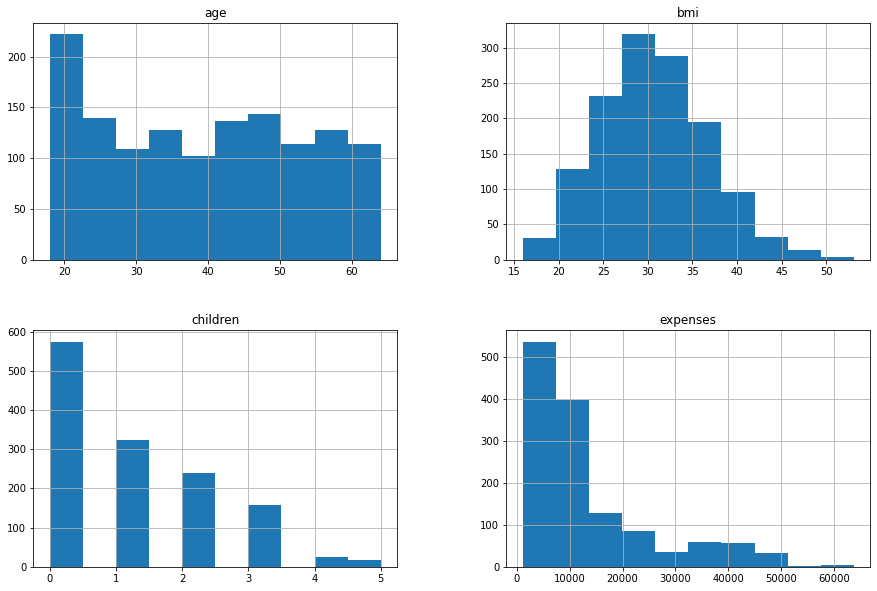

In [12]:
medical.hist(bins = 10, figsize=(15,10))

In [13]:
# Regression Plot

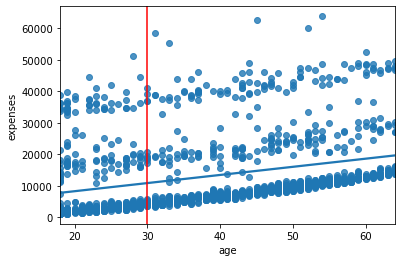

In [14]:
sns.regplot(x='age', y='expenses', data=medical,ci=None)
plt.axvline(30, color='r')

#### From this graph we can say that with the increase of age the expense is also increasing. In any particular age there are three distinguishable expense cluster and in the lowest cluster the dense of population is highest which is gradually decreasing for higher expense clusters. An example is shown here with the age '30'

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

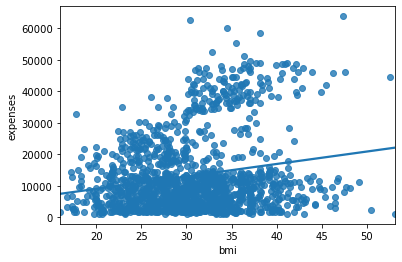

In [15]:
sns.regplot(x='bmi', y='expenses', data=medical,ci=None)

#### In this graph also we can see that the expense is gradually increasing with the increase of bmi.

<AxesSubplot:xlabel='sex', ylabel='count'>

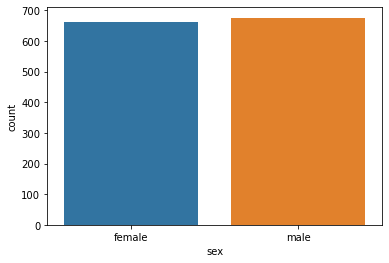

In [16]:
sns.countplot(x='sex',data=medical)

## Count of Male and Female are almost equal

Text(0, 0.5, 'mean_expenses')

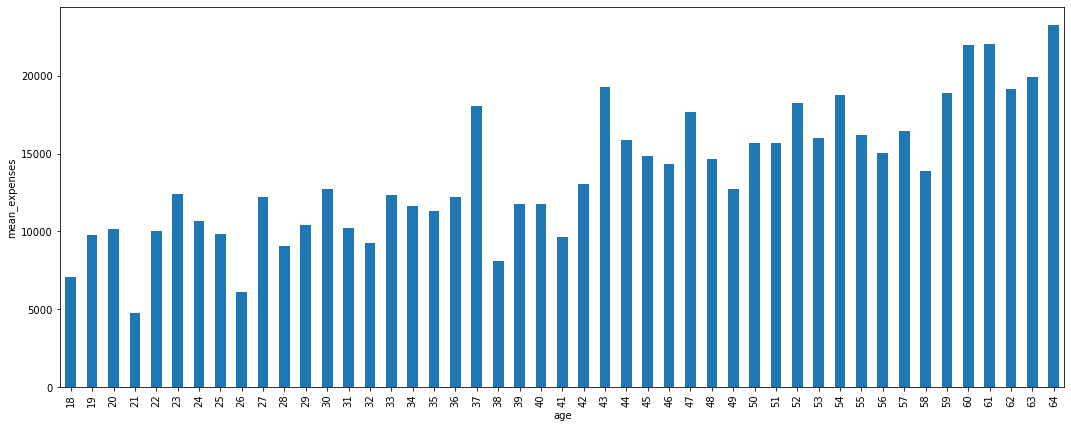

In [17]:
medical.groupby(by = 'age')['expenses'].mean().plot(kind = 'bar',figsize=(18,7))
plt.ylabel('mean_expenses')

#### If checking the mean expense for individual age group then we can see that as age increases the mean expense also increases

### Correlation

In [18]:
corr = medical.corr()

In [19]:
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

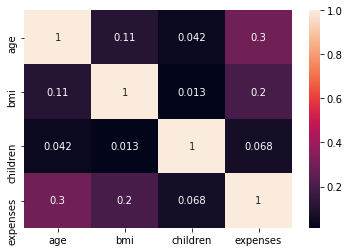

In [20]:
sns.heatmap(medical.corr(),annot= True)

In [21]:
corr.expenses.sort_values(ascending=False)

expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
Name: expenses, dtype: float64

### It can be said from the correlation values that , expenses are more likely to be impacted by age . Also it can be said that age and bmi have a very weak positive correlation with expense

## Making some age category which can help in understanding categorywise mean expense 

### Below we are checking few properties of age attribute and categorizing it.

In [22]:
np.min(medical.age)

18

In [23]:
np.max(medical.age)

64

In [24]:
len(medical.age.unique())

47

In [25]:
len(np.ceil(medical.age).unique())

47

In [26]:
medical['age_cat']=np.ceil(medical.age / 18)

In [27]:
len(medical.age_cat.value_counts().sort_index(ascending= True))

4

In [28]:
medical.age_cat.value_counts().sort_index(ascending = True)

1.0     69
2.0    530
3.0    497
4.0    242
Name: age_cat, dtype: int64

In [29]:
count = medical.age_cat.value_counts()

<AxesSubplot:xlabel='age_cat', ylabel='count'>

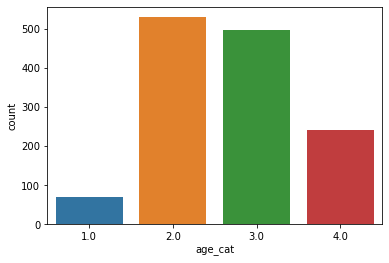

In [30]:
sns.countplot(x= 'age_cat', data= medical)

<AxesSubplot:xlabel='children', ylabel='count'>

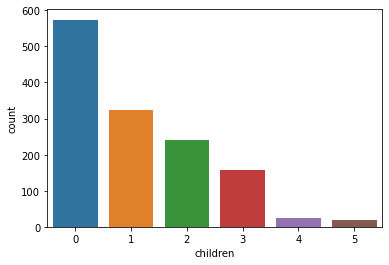

In [31]:
sns.countplot(x ='children', data = medical)

In [32]:
medical['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

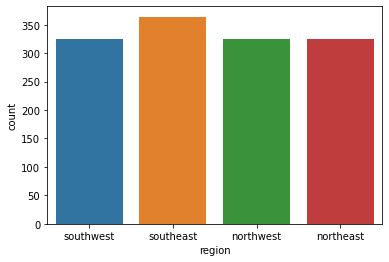

In [33]:
sns.countplot(x = 'region', data= medical)

In [34]:
medical['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

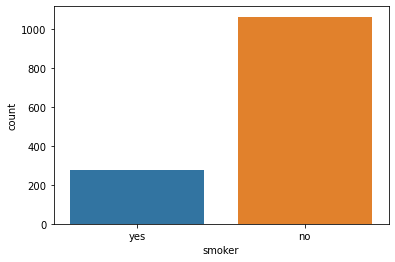

In [35]:
sns.countplot(x = 'smoker', data=medical)

In [36]:
medical['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [37]:
medical

,age,sex,bmi,children,smoker,region,expenses,age_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0
1,18,male,33.8,1,no,southeast,1725.55,1.0
2,28,male,33.0,3,no,southeast,4449.46,2.0
3,33,male,22.7,0,no,northwest,21984.47,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,3.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0
1335,18,female,36.9,0,no,southeast,1629.83,1.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0


In [38]:
m1 = medical[medical['age_cat']==1.0].sort_index(ascending = True)

In [39]:
m1['age'].unique()

array([18], dtype=int64)

In [40]:
m1['age'].value_counts()

18    69
Name: age, dtype: int64

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='Count'>

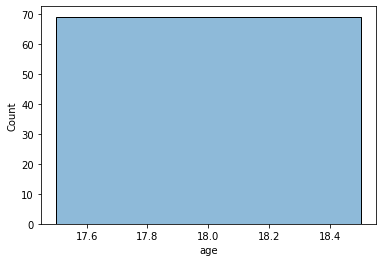

In [41]:
sns.histplot(x='age',data=m1, kde=True)

In [42]:
m2 = medical[medical['age_cat']==2.0].sort_index(ascending = True)

In [43]:
m2['age'].nunique()

18

In [44]:
m2['age'].unique()

array([19, 28, 33, 32, 31, 25, 23, 27, 30, 34, 22, 26, 35, 24, 36, 21, 20,
       29], dtype=int64)

In [45]:
m2['age'].value_counts()

19    68
20    29
25    28
27    28
26    28
28    28
24    28
23    28
22    28
21    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

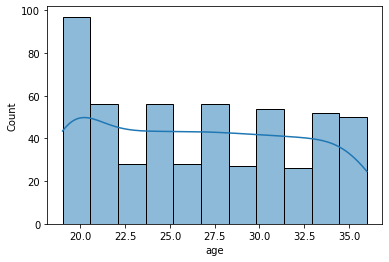

In [46]:
sns.histplot(x='age', data=m2, kde=True)

In [47]:
m3 = medical[medical['age_cat']==3.0].sort_index(ascending = True)

In [48]:
m3

,age,sex,bmi,children,smoker,region,expenses,age_cat
6,46,female,33.4,1,no,southeast,8240.59,3.0
7,37,female,27.7,3,no,northwest,7281.51,3.0
8,37,male,29.8,2,no,northeast,6406.41,3.0
16,52,female,30.8,1,no,northeast,10797.34,3.0
24,37,male,28.0,2,no,northwest,6203.90,3.0
...,...,...,...,...,...,...,...,...
1326,42,female,32.9,0,no,northeast,7050.02,3.0
1327,51,male,30.0,1,no,southeast,9377.90,3.0
1329,52,male,38.6,2,no,southwest,10325.21,3.0
1332,52,female,44.7,3,no,southwest,11411.69,3.0


In [49]:
m3['age'].nunique()

18

In [50]:
m3['age'].unique()

array([46, 37, 52, 41, 38, 48, 40, 53, 43, 44, 45, 54, 49, 47, 51, 42, 50,
       39], dtype=int64)

In [51]:
m3['age'].value_counts()

46    29
47    29
52    29
51    29
50    29
48    29
45    29
53    28
49    28
54    28
44    27
43    27
42    27
41    27
40    27
38    25
39    25
37    25
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

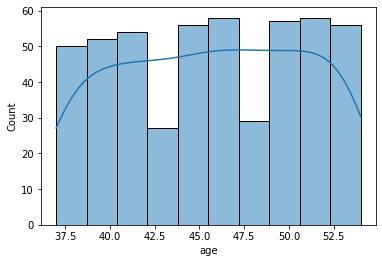

In [52]:
sns.histplot(x='age', data=m3, kde=True)

In [53]:
m3['age'].min(), m3['age'].max()

(37, 54)

In [54]:
m4 = medical[medical['age_cat']==4.0]

In [55]:
m4

,age,sex,bmi,children,smoker,region,expenses,age_cat
9,60,female,25.8,0,no,northwest,28923.14,4.0
11,62,female,26.3,0,yes,southeast,27808.73,4.0
13,56,female,39.8,0,no,southeast,11090.72,4.0
18,56,male,40.3,0,no,southwest,10602.39,4.0
20,60,female,36.0,0,no,northeast,13228.85,4.0
...,...,...,...,...,...,...,...,...
1321,62,male,26.7,0,yes,northeast,28101.33,4.0
1322,62,male,38.8,0,no,southeast,12981.35,4.0
1325,61,male,33.5,0,no,northeast,13143.34,4.0
1330,57,female,25.7,2,no,southeast,12629.17,4.0


In [56]:
m4['age'].unique()

array([60, 62, 56, 59, 63, 55, 58, 64, 61, 57], dtype=int64)

In [57]:
m4['age'].value_counts()

55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

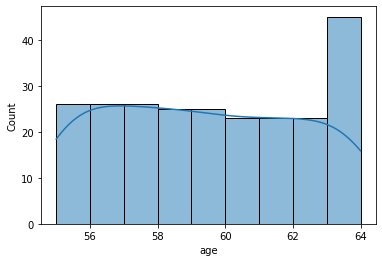

In [58]:
sns.histplot(x='age', data=m4, kde=True)

In [59]:
# Checking for the proportion of each age category in the dataset
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

In [60]:
## In age category 2 the count of people is higher than other categories

### Similar categorization for BMI as after age expense is impacted by bmi.

In [61]:
np.min(medical.bmi)

16.0

In [62]:
np.max(medical.bmi)

53.1

In [63]:
len(medical['bmi'].unique())

275

In [64]:
## Similar operation performed on BMI as age to check which category has higher average medical expense 

In [65]:
medical['bmi_cat']=np.ceil(medical.bmi / 16)

In [66]:
medical.bmi_cat.value_counts().sort_index(ascending=True)

1.0      1
2.0    802
3.0    530
4.0      5
Name: bmi_cat, dtype: int64

In [67]:
medical.bmi_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.000747
2.0    0.599402
3.0    0.396114
4.0    0.003737
Name: bmi_cat, dtype: float64

In [68]:
medical

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0,2.0
1,18,male,33.8,1,no,southeast,1725.55,1.0,3.0
2,28,male,33.0,3,no,southeast,4449.46,2.0,3.0
3,33,male,22.7,0,no,northwest,21984.47,2.0,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0,2.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,3.0,2.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0,2.0
1335,18,female,36.9,0,no,southeast,1629.83,1.0,3.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0,2.0


In [69]:
b1 = medical[medical['bmi_cat']==1.0]

In [70]:
b1

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
172,18,male,16.0,0,no,northeast,1694.8,1.0,1.0


In [71]:
b1['bmi'].nunique()

1

In [72]:
b1['bmi'].value_counts()

16.0    1
Name: bmi, dtype: int64

In [73]:
b2 = medical[medical['bmi_cat']==2.0]

In [74]:
b2

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0,2.0
3,33,male,22.7,0,no,northwest,21984.47,2.0,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0,2.0
5,31,female,25.7,0,no,southeast,3756.62,2.0,2.0
7,37,female,27.7,3,no,northwest,7281.51,3.0,2.0
...,...,...,...,...,...,...,...,...,...
1330,57,female,25.7,2,no,southeast,12629.17,4.0,2.0
1333,50,male,31.0,3,no,northwest,10600.55,3.0,2.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0,2.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0,2.0


In [75]:
b2['bmi'].nunique()

143

In [76]:
# checking the min and max value of bmi category 2.0
b2['bmi'].min(), b2['bmi'].max()

(16.8, 32.0)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

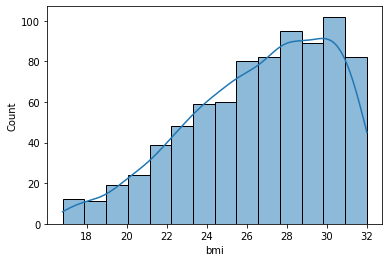

In [77]:
sns.histplot(x='bmi',data=b2, kde=True)

In [78]:
b3 = medical[medical['bmi_cat']==3.0]

In [79]:
b3

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
1,18,male,33.8,1,no,southeast,1725.55,1.0,3.0
2,28,male,33.0,3,no,southeast,4449.46,2.0,3.0
6,46,female,33.4,1,no,southeast,8240.59,3.0,3.0
12,23,male,34.4,0,no,southwest,1826.84,2.0,3.0
13,56,female,39.8,0,no,southeast,11090.72,4.0,3.0
...,...,...,...,...,...,...,...,...,...
1326,42,female,32.9,0,no,northeast,7050.02,3.0,3.0
1329,52,male,38.6,2,no,southwest,10325.21,3.0,3.0
1331,23,female,33.4,0,no,southwest,10795.94,2.0,3.0
1332,52,female,44.7,3,no,southwest,11411.69,3.0,3.0


In [80]:
b3['bmi'].nunique()

126

In [81]:
# checking the min and max value of bmi category 2.0
b3['bmi'].min(), b3['bmi'].max()

(32.1, 47.7)

In [82]:
b3['bmi'].unique()

array([33.8, 33. , 33.4, 34.4, 39.8, 42.1, 40.3, 35.3, 36. , 32.4, 34.1,
       32.8, 36.3, 35.6, 36.4, 36.7, 39.9, 36.6, 37.1, 37.3, 38.7, 34.8,
       35.2, 33.6, 37. , 33.7, 39.1, 36.2, 34. , 35.5, 38.3, 37.6, 41.2,
       39.5, 35.1, 35.7, 32.2, 33.9, 37.4, 34.7, 35.9, 32.5, 38.8, 37.7,
       36.9, 39.6, 33.2, 41.5, 33.3, 41.9, 32.1, 39.3, 36.1, 38.1, 38.4,
       34.2, 40.2, 42.4, 40.6, 36.8, 45.5, 37.5, 38. , 34.9, 33.1, 40.9,
       36.5, 34.5, 32.3, 35.8, 43.9, 32.9, 43.3, 38.2, 47.5, 39.2, 46.8,
       32.7, 33.5, 43. , 38.6, 46.5, 32.6, 41.3, 34.3, 43.4, 44.2, 39.4,
       40.5, 38.9, 47.4, 35.4, 46.7, 46.2, 44.8, 43.1, 45.4, 37.8, 42.5,
       39. , 39.7, 35. , 42.7, 40.8, 41.7, 44.7, 40.7, 37.9, 34.6, 41.1,
       41.8, 42.2, 41.4, 42.9, 47.6, 43.7, 44. , 37.2, 46.1, 40. , 45.3,
       47.7, 42.8, 45.9, 44.9, 40.4])

In [83]:
b3['bmi'].value_counts()

33.3    17
32.3    15
37.1    13
34.1    12
32.8    11
        ..
45.4     1
44.0     1
42.2     1
40.7     1
44.9     1
Name: bmi, Length: 126, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

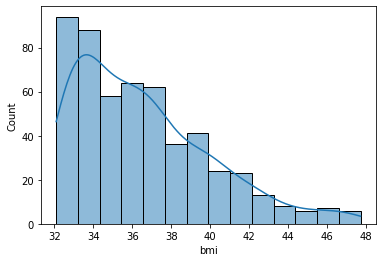

In [84]:
sns.histplot(x='bmi',data=b3,kde=True)

In [85]:
b4 = medical[medical['bmi_cat']==4.0]

In [86]:
b4

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
116,58,male,49.1,0,no,southeast,11381.33,4.0,4.0
286,46,female,48.1,2,no,northeast,9432.93,3.0,4.0
847,23,male,50.4,1,no,southeast,2438.06,2.0,4.0
1047,22,male,52.6,1,yes,southeast,44501.40,2.0,4.0
1317,18,male,53.1,0,no,southeast,1163.46,1.0,4.0


In [87]:
b4['bmi'].value_counts()

52.6    1
48.1    1
49.1    1
50.4    1
53.1    1
Name: bmi, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

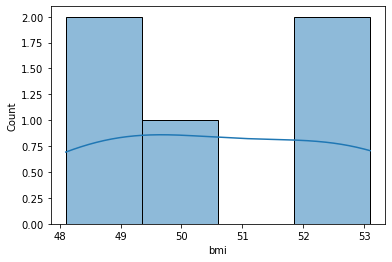

In [88]:
sns.histplot(x='bmi', data=b4,kde=True)

<AxesSubplot:xlabel='bmi_cat', ylabel='count'>

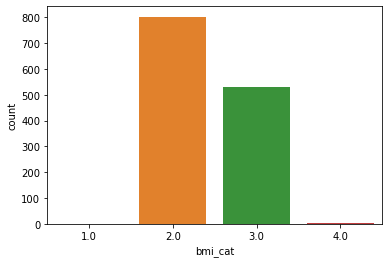

In [89]:
sns.countplot(x= 'bmi_cat', data= medical)

<AxesSubplot:xlabel='age'>

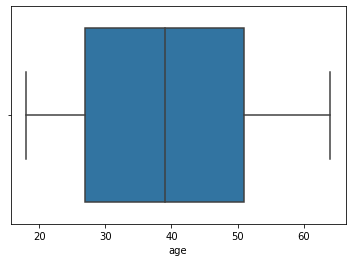

In [90]:
sns.boxplot(x='age', data=medical)

<AxesSubplot:xlabel='bmi'>

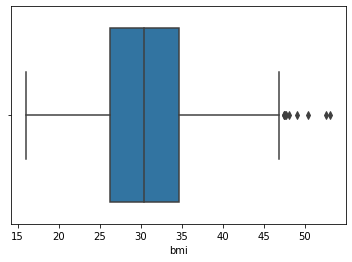

In [91]:
sns.boxplot(x='bmi', data=medical)

## Only BMI has few outliers , age doesn't have any outliers

### Plot of the Mean Expense vs Attributes

age_cat


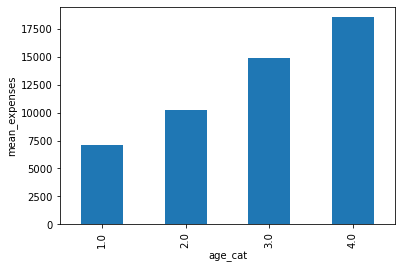

sex


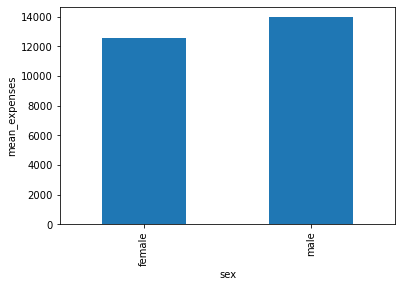

region


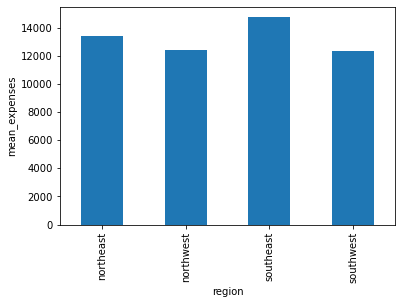

bmi_cat


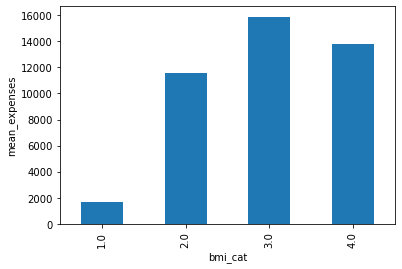

children


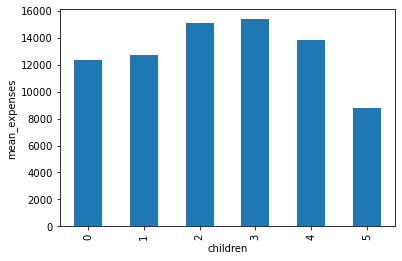

smoker


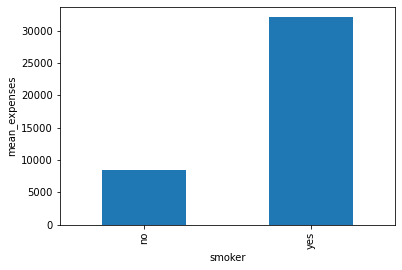

In [92]:
lst = ['age_cat','sex','region','bmi_cat','children', 'smoker']
for i in lst:
    data = medical.groupby(by = i)['expenses'].mean().plot(kind = 'bar')
    print(i)
    plt.ylabel('mean_expenses')
    plt.show()

#### Mean expense is highest for the age category 4.0 among all other age categories.
#### Mean expense is highest for Male among all genders.
#### Mean expense is higher for southwest region among all other regions.
#### Mean expense is higher for the bmi category 3.0 among all other categories of bmi.
#### Mean expense is higher for the category having 3 children followed by 2 children.

### Checking for the proportion of each age category in the dataset

In [93]:
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

In [94]:
medical = medical.drop('age_cat',axis=1)
medical = medical.drop('bmi_cat',axis=1)

In [95]:
medical

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [96]:
X = medical.drop('expenses', axis = 1)
y = medical['expenses']

In [97]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [98]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Splitting into test data and train data

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

### checking whether percentage of train and test data set are according to the given ratio or not

In [102]:
(len(X_train)/len(medical))*100

79.97010463378177

In [103]:
(len(X_test)/len(medical))*100

20.029895366218238

In [104]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.1,0,yes,southeast
575,58,female,27.2,0,no,northwest
535,38,male,28.0,1,no,northeast
543,54,female,47.4,0,yes,southeast


In [105]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,20.0,2,no,northwest
1285,47,female,24.3,0,no,northeast
1142,52,female,24.9,0,no,southeast
969,39,female,34.3,5,no,southeast
486,54,female,21.5,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.4,4,no,northeast
1130,39,female,23.9,5,no,southeast
1294,58,male,25.2,0,no,northeast
860,37,female,47.6,2,yes,southwest


In [106]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [107]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

# Data Preprocessing

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


#### Separating numerical and categorical attributes

In [109]:
X_train_num = X_train.drop(['sex','smoker','region'],axis = 1)

In [110]:
X_train_num

,age,bmi,children
560,46,20.0,2
1285,47,24.3,0
1142,52,24.9,0
969,39,34.3,5
486,54,21.5,3
...,...,...,...
1095,18,31.4,4
1130,39,23.9,5
1294,58,25.2,0
860,37,47.6,2


In [111]:
X_train_cat = X_train[['sex','smoker','region']]

In [112]:
X_train_cat

,sex,smoker,region
560,female,no,northwest
1285,female,no,northeast
1142,female,no,southeast
969,female,no,southeast
486,female,no,northwest
...,...,...,...
1095,female,no,northeast
1130,female,no,southeast
1294,male,no,northeast
860,female,yes,southwest


In [113]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [114]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1070 non-null   object
 1   smoker  1070 non-null   object
 2   region  1070 non-null   object
dtypes: object(3)
memory usage: 33.4+ KB


#### We can see from the above that there are no null values in x_train and x_test itself. So most likely, we won't need null value imputation

# Scaling

In [115]:
### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
X_train_num_ndarray = scaler.fit_transform(X_train_num)

In [119]:
X_train_num_ndarray

array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211],
       [-0.16755139,  2.82063006,  0.73433626],
       [ 1.1120044 , -0.1096194 , -0.91119211]])

In [120]:
X_train_num_ndarray[:10]

array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       [-0.02537852,  0.6188042 ,  3.20262882],
       [ 1.04091797, -1.50024626,  1.55710045],
       [ 1.68069586,  1.81077008, -0.91119211],
       [-1.23384787, -1.03670397, -0.91119211],
       [-1.5181936 , -1.48369117, -0.91119211],
       [ 0.04570791,  1.76110483, -0.08842793],
       [-0.16755139,  0.60224912, -0.08842793]])

In [121]:
X_train_num_columns_scaled_df = pd.DataFrame(X_train_num_ndarray, columns=X_train_num.columns)

In [122]:
X_train_num_columns_scaled_df.head()

,age,bmi,children
0,0.472227,-1.748572,0.734336
1,0.543313,-1.036704,-0.911192
2,0.898745,-0.937373,-0.911192
3,-0.025379,0.618804,3.202629
4,1.040918,-1.500246,1.557100


## Dummy Encoding on train set

In [123]:
X_train_dummy_columns_df=pd.get_dummies(X_train_cat, drop_first = True)

In [124]:
X_train_dummy_columns_df

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0,0,1,0,0
1285,0,0,0,0,0
1142,0,0,0,1,0
969,0,0,0,1,0
486,0,0,1,0,0
...,...,...,...,...,...
1095,0,0,0,0,0
1130,0,0,0,1,0
1294,1,0,0,0,0
860,0,1,0,0,1


In [125]:
X_train_num_columns_scaled_df.index

RangeIndex(start=0, stop=1070, step=1)

In [126]:
X_train_dummy_columns_df.index

Int64Index([ 560, 1285, 1142,  969,  486,  170,  277, 1033,  209,  947,
            ...
             330, 1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1126],
           dtype='int64', length=1070)

In [127]:
X_train_num_columns_scaled_df.index = X_train_dummy_columns_df.index

## Combining Preprocessed Results on Train Dataset

In [128]:
X_train_final = pd.concat([X_train_num_columns_scaled_df, X_train_dummy_columns_df],axis=1)

In [129]:
X_train_final.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.748572,0.734336,0,0,1,0,0
1285,0.543313,-1.036704,-0.911192,0,0,0,0,0
1142,0.898745,-0.937373,-0.911192,0,0,0,1,0
969,-0.025379,0.618804,3.202629,0,0,0,1,0
486,1.040918,-1.500246,1.557100,0,0,1,0,0


# Preprocessing on Test Dataset

In [130]:
X_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest


In [131]:
X_test_num = X_test.drop(['sex','smoker','region'],axis = 1)

In [132]:
X_test_cat = X_test[['sex','smoker','region']]

In [133]:
X_test_num.head()

,age,bmi,children
764,45,25.2,2
887,36,30.0,0
890,64,26.9,0
1293,46,25.7,3
259,19,31.9,0


In [134]:
X_test_cat.head()

,sex,smoker,region
764,female,no,northeast
887,female,no,northwest
890,female,yes,northwest
1293,male,no,northwest
259,male,yes,northwest


In [135]:
# Scaling on numerical Data
X_test_num_ndarray = scaler.transform(X_test_num)

In [136]:
X_test_num_columns_scaled_df = pd.DataFrame(X_test_num_ndarray, columns=X_test_num.columns)

In [137]:
X_test_num_columns_scaled_df

,age,bmi,children
0,0.401140,-0.887708,0.734336
1,-0.238638,-0.093064,-0.911192
2,1.751782,-0.606272,-0.911192
3,0.472227,-0.804933,1.557100
4,-1.447107,0.221482,-0.911192
...,...,...,...
263,1.680696,0.751245,-0.911192
264,1.325264,-0.556607,-0.911192
265,-0.096465,-0.424166,-0.088428
266,1.040918,2.787520,-0.911192


## Dummy Encoding on test set

In [138]:
X_test_dummy_columns_df=pd.get_dummies(X_test_cat, drop_first = True)

In [139]:
X_test_dummy_columns_df.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0,0,0,0,0
887,0,0,1,0,0
890,0,1,1,0,0
1293,1,0,1,0,0
259,1,1,1,0,0


In [140]:
X_test_dummy_columns_df.shape

(268, 5)

In [141]:
X_test_num_columns_scaled_df.index

RangeIndex(start=0, stop=268, step=1)

In [142]:
X_test_dummy_columns_df.index

Int64Index([ 764,  887,  890, 1293,  259, 1312,  899,  752, 1286,  707,
            ...
             900,  708,   54,  370,  741,  109,  575,  535,  543,  846],
           dtype='int64', length=268)

In [143]:
X_test_num_columns_scaled_df.index = X_test_dummy_columns_df.index

## Combining Preprocessed Results on Test Dataset

In [144]:
X_test_final = pd.concat([X_test_num_columns_scaled_df, X_test_dummy_columns_df],axis=1)

In [145]:
X_test_final

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0.401140,-0.887708,0.734336,0,0,0,0,0
887,-0.238638,-0.093064,-0.911192,0,0,1,0,0
890,1.751782,-0.606272,-0.911192,0,1,1,0,0
1293,0.472227,-0.804933,1.557100,1,0,1,0,0
259,-1.447107,0.221482,-0.911192,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,1.680696,0.751245,-0.911192,1,1,0,1,0
575,1.325264,-0.556607,-0.911192,0,0,1,0,0
535,-0.096465,-0.424166,-0.088428,1,0,0,0,0
543,1.040918,2.787520,-0.911192,0,1,0,1,0


In [146]:
X_train_final.shape, X_test_final.shape

((1070, 8), (268, 8))

# Using Model for prediction and calculation of MSE and RMSE

### Ordinary Least Square Model(OLS)

In [147]:
import statsmodels.api as sm

In [148]:
x_train_const = sm.add_constant(X_train_final)

In [149]:
x_train_const

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,1.0,0.472227,-1.748572,0.734336,0,0,1,0,0
1285,1.0,0.543313,-1.036704,-0.911192,0,0,0,0,0
1142,1.0,0.898745,-0.937373,-0.911192,0,0,0,1,0
969,1.0,-0.025379,0.618804,3.202629,0,0,0,1,0
486,1.0,1.040918,-1.500246,1.557100,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,1.0,-1.518194,0.138707,2.379865,0,0,0,0,0
1130,1.0,-0.025379,-1.102924,3.202629,0,0,0,1,0
1294,1.0,1.325264,-0.887708,-0.911192,1,0,0,0,0
860,1.0,-0.167551,2.820630,0.734336,0,1,0,0,1


In [150]:
y_train[:5]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [151]:
x_train_const.shape, y_train.shape

((1070, 9), (1070,))

In [152]:
ols_model = sm.OLS( y_train, x_train_const)

In [153]:
results = ols_model.fit()

In [154]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.26e-305
Time:                        23:51:46   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8955.3727    434.311  

### The model can explain 74% variability of the whole dependent variacle by its independent variables. We can see that the variable 'sex_male', 'region_southwest', 'region_southeast', 'region_northwest' have the p-value greater than 0.05. So these variables are not significant. So we are removing these variables and rebuilding the model

In [155]:
x_train_const = x_train_const.drop(['sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)

In [156]:
x_train_const.shape

(1070, 5)

In [157]:
#x_train_const

In [158]:
y_train.shape

(1070,)

In [159]:
#y_train

In [160]:
ols_model1 = sm.OLS(y_train, x_train_const)

In [161]:
results1 = ols_model1.fit()

In [162]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     762.2
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.20e-310
Time:                        23:51:47   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1065   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8482.9903    210.223     40.352      0.0

### We can see that removing the variables also there is no change in the adjusted R2 score of the model. So we can go with this model

### Prediction of y_train

In [163]:
y_train_hat = results1.predict(x_train_const)

In [164]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [165]:
y_train_hat

560      7111.116042
1285     7922.099702
1142     9403.978012
969     11280.367072
486     10086.635869
            ...     
1095     4504.393662
1130     7872.415476
1294    11044.603171
860     37494.165066
1126    11813.575711
Length: 1070, dtype: float64

In [166]:
concat_train_pred_df = pd.concat([y_train, y_train_hat],axis=1)

In [167]:
concat_train_pred_df.columns = ['Actual expense of train set', 'Predicted expense of train set']

In [168]:
concat_train_pred_df

,Actual expense of train set,Predicted expense of train set
560,9193.84,7111.116042
1285,8534.67,7922.099702
1142,27117.99,9403.978012
969,8596.83,11280.367072
486,12475.35,10086.635869
...,...,...
1095,4561.19,4504.393662
1130,8582.30,7872.415476
1294,11931.13,11044.603171
860,46113.51,37494.165066


In [169]:
from sklearn.metrics import mean_squared_error

In [170]:
mse_ols_train = mean_squared_error(y_train, y_train_hat)

In [171]:
print("Root Mean squared error for train set: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_hat)))

Root Mean squared error for train set: 6112.77


### Predicting The test set

In [172]:
x_test_const = sm.add_constant(X_test_final)

In [173]:
x_test_const

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,1.0,0.401140,-0.887708,0.734336,0,0,0,0,0
887,1.0,-0.238638,-0.093064,-0.911192,0,0,1,0,0
890,1.0,1.751782,-0.606272,-0.911192,0,1,1,0,0
1293,1.0,0.472227,-0.804933,1.557100,1,0,1,0,0
259,1.0,-1.447107,0.221482,-0.911192,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
109,1.0,1.680696,0.751245,-0.911192,1,1,0,1,0
575,1.0,1.325264,-0.556607,-0.911192,0,0,1,0,0
535,1.0,-0.096465,-0.424166,-0.088428,1,0,0,0,0
543,1.0,1.040918,2.787520,-0.911192,0,1,0,1,0


In [174]:
x_test_const = x_test_const.drop(['sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)

In [175]:
x_test_const.shape

(268, 5)

In [176]:
y_test.shape

(268,)

In [177]:
y_test_hat = results1.predict(x_test_const)

In [178]:
y_test_hat

764      8558.038697
887      6962.334745
890     36796.339125
1293     9406.498864
259     26867.385925
            ...     
109     39226.324740
575     11699.978478
535      7248.628923
543     40943.404585
846     12621.983243
Length: 268, dtype: float64

In [179]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [180]:
concat_test_pred_df = pd.concat([y_test, y_test_hat],axis=1)

In [181]:
concat_test_pred_df.columns = ['Actual expense for test set', 'predicted expense for test set']

In [182]:
concat_test_pred_df

,Actual expense for test set,predicted expense for test set
764,9095.07,8558.038697
887,5272.18,6962.334745
890,29330.98,36796.339125
1293,9301.89,9406.498864
259,33750.29,26867.385925
...,...,...
109,47055.53,39226.324740
575,12222.90,11699.978478
535,6067.13,7248.628923
543,63770.43,40943.404585


In [183]:
print("Root Mean squared error for test set: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_hat)))

Root Mean squared error for test set: 5829.68


In [184]:
# Calculating R2 Score 
# R2 score helps to know how fit the model is for the problem
# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# Also known as coefficient of determination
# basically varies from 0 to 1 or 0% to 100% 
# 0% means the model explains none of the variability of the data around the mean
# 100% means the model explains all the variablity of the data around the mean
# It can be negative also when the model is extremely worse.
# If a model always gives the expected value of y disregarding the features then it gets R2 score as 0
# Higher the score better the model will be fit for the problem

In [185]:
from sklearn.metrics import r2_score

In [186]:
r2_score(y_train, y_train_hat)

0.7411141549979002

In [187]:
r2_score(y_test, y_test_hat)

0.7810924113697999

#### For train set the r2 score is 74% and for test set the r2 score was found as 78%

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

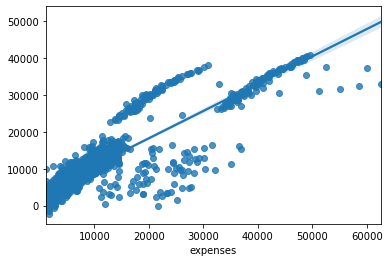

In [188]:
sns.regplot(y_train, y_train_hat)

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

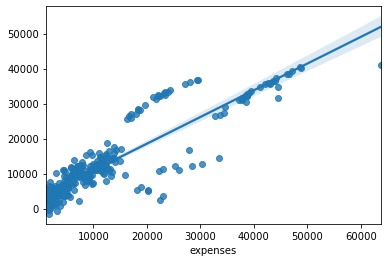

In [189]:
sns.regplot(y_test, y_test_hat)

### The best fit line for train and test set are shown above

### Checking the residuals

In [190]:
res_ols = y_test - y_test_hat

<AxesSubplot:ylabel='Count'>

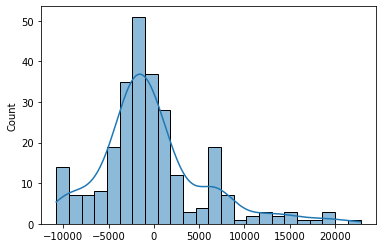

In [191]:
sns.histplot(res_ols, kde=True)

#### The residual is normally distributed but slightly skewed in nature

Text(0, 0.5, 'residual')

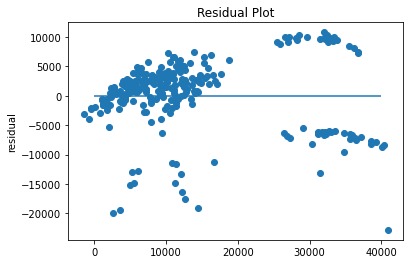

In [192]:
plt.scatter(y_test_hat, y_test_hat - y_test)
plt.hlines(y= 0, xmin = 0, xmax= 40000)
plt.title('Residual Plot')
plt.ylabel('residual')

## Decision Tree

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
tree_reg = DecisionTreeRegressor()

In [195]:
tree_reg.fit(X_train_final, y_train)

DecisionTreeRegressor()

### Predicting train set

In [196]:
y_pred_train_tree = tree_reg.predict(X_train_final)

In [197]:
y_train[:5]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [198]:
y_pred_train_tree[:5]

array([ 9193.84,  8534.67, 27117.99,  8596.83, 12475.35])

#### MSE and RMSE of Train set

In [199]:
mse_tree_train = mean_squared_error(y_train, y_pred_train_tree)

In [200]:
mse_tree_train

244239.68681906545

In [201]:
np.sqrt(mse_tree_train)

494.2061177475097

### R2 score of train set

In [202]:
r2_score(y_train, y_pred_train_tree)

0.9983078115527046

### Predicting Test Set

In [203]:
y_pred_test_tree = tree_reg.predict(X_test_final)

In [204]:
y_test[:5]

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
Name: expenses, dtype: float64

In [205]:
y_pred_test_tree[:5]

array([ 8615.3 ,  4571.41, 28950.47,  9225.26, 33732.69])

In [206]:
X_train_final

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.748572,0.734336,0,0,1,0,0
1285,0.543313,-1.036704,-0.911192,0,0,0,0,0
1142,0.898745,-0.937373,-0.911192,0,0,0,1,0
969,-0.025379,0.618804,3.202629,0,0,0,1,0
486,1.040918,-1.500246,1.557100,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,-1.518194,0.138707,2.379865,0,0,0,0,0
1130,-0.025379,-1.102924,3.202629,0,0,0,1,0
1294,1.325264,-0.887708,-0.911192,1,0,0,0,0
860,-0.167551,2.820630,0.734336,0,1,0,0,1


In [207]:
X_test_final

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0.401140,-0.887708,0.734336,0,0,0,0,0
887,-0.238638,-0.093064,-0.911192,0,0,1,0,0
890,1.751782,-0.606272,-0.911192,0,1,1,0,0
1293,0.472227,-0.804933,1.557100,1,0,1,0,0
259,-1.447107,0.221482,-0.911192,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,1.680696,0.751245,-0.911192,1,1,0,1,0
575,1.325264,-0.556607,-0.911192,0,0,1,0,0
535,-0.096465,-0.424166,-0.088428,1,0,0,0,0
543,1.040918,2.787520,-0.911192,0,1,0,1,0


#### MSE and RMSE of Test set

In [208]:
mse_tree_test = mean_squared_error(y_test, y_pred_test_tree)

In [209]:
rmse_tree_test = np.sqrt(mse_tree_test)

In [210]:
rmse_tree_test

6388.119437062707

### R2 score of Test set

In [211]:
r2_score(y_test, y_pred_test_tree)

0.7371439433835588

### Decision Tree seems to be overfitting as it has a low rmse for train set and high rmse for test set

## KNN (K- Nearest Neighbour)

In [212]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [213]:
model = KNR(n_neighbors = 3)     # Taking nearest neighbors as 3 

In [214]:
model.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=3)

### Predicting Train set

In [215]:
y_train_pred_KNR = model.predict(X_train_final)

In [216]:
y_train_pred_KNR

array([ 8761.28666667,  8685.83      , 15851.03333333, ...,
       11806.83      , 20448.45333333, 10343.50666667])

In [217]:
y_train[:5]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

### Predicting Test Set

In [218]:
y_test_pred_KNR = model.predict(X_test_final)

In [219]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [220]:
y_test_pred_KNR[:5]

array([ 8650.57666667,  5166.49      , 27923.53666667,  8192.86      ,
       23960.94333333])

#### RMSE of Train set

In [221]:
train_rmse_error_KNR = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))

In [222]:
print("The train set error is :", train_rmse_error_KNR)

The train set error is : 4464.717182972153


#### RMSE of Test set

In [223]:
test_rmse_error_KNR = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

In [224]:
print("The test set error is :", test_rmse_error_KNR)

The test set error is : 6657.947283058654


### For Test set the error is quite higher than the train set

## Trying different value of K to check which value gives lowest RMSE

In [225]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(20):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 7536.725835617839
R2 score for value k=  1 is: 0.6341210974309792
RMSE value for k=  2 is: 6960.863839043208
R2 score for value k=  2 is: 0.6878968077710723
RMSE value for k=  3 is: 6657.947283058654
R2 score for value k=  3 is: 0.7144694133097766
RMSE value for k=  4 is: 6474.351450747474
R2 score for value k=  4 is: 0.7299995581187625
RMSE value for k=  5 is: 6838.664775371341
R2 score for value k=  5 is: 0.698758664324181
RMSE value for k=  6 is: 6919.588027588111
R2 score for value k=  6 is: 0.6915871883648751
RMSE value for k=  7 is: 6919.749468103407
R2 score for value k=  7 is: 0.69157279707341
RMSE value for k=  8 is: 7043.61342593082
R2 score for value k=  8 is: 0.6804322399099825
RMSE value for k=  9 is: 7227.300412162068
R2 score for value k=  9 is: 0.6635471994284639
RMSE value for k=  10 is: 7255.838734043145
R2 score for value k=  10 is: 0.6608848621785536
RMSE value for k=  11 is: 7318.007877050591
R2 score for value k=  11 is: 0.6550487852432864

## For Test Dataset we are taking K value as the square root of Total Test Dataset and checking which K value gives lowest RMSE 

In [226]:
rmse_val_list = list() #to store rmse values for different k
rmse_val_df = pd.DataFrame(columns=["K","Error"])

iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    
    
    rmse_val_list.append(error) #store rmse values
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


The minimum error we get is  6474.351450747474
The corresponding K value is  4


In [227]:
rmse_df = pd.DataFrame(rmse_val_df).set_index('K')
rmse_df

,Error
K,
1.0,7536.725836
2.0,6960.863839
3.0,6657.947283
4.0,6474.351451
5.0,6838.664775
6.0,6919.588028
7.0,6919.749468
8.0,7043.613426
9.0,7227.300412


### Elbow curve for determining the value of K

<AxesSubplot:xlabel='K'>

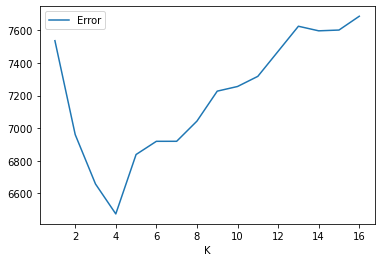

In [228]:
rmse_df.plot()

### As we can see that for k value 4 the error is minimum . So probably we need to fix the k value at 4

In [229]:
from sklearn.model_selection import cross_val_score

In [230]:
#mses_model = -cross_val_score(model, X_train_final, y_train, cv = 5, scoring = 'neg_mean_squared_error')

In [231]:
#mses_model

## Grid Search

In [232]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(3,50,2),'weights':['uniform', 'distance'],'p':[1,2]}

In [233]:
gserach = GridSearchCV(estimator=model,param_grid=params,cv=5)

gserach.fit(X_train_final,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=16),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [234]:
gserach.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [235]:
model_best = KNR(n_neighbors = 5,p=1,weights='distance')

In [236]:
model_best.fit(X_train_final, y_train)

KNeighborsRegressor(p=1, weights='distance')

#### Predicting Train Set

In [237]:
y_train_pred_KNR = model_best.predict(X_train_final)

In [238]:
y_train[:5]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [239]:
y_train_pred_KNR[:5]

array([ 9193.84,  8534.67, 27117.99,  8596.83, 12475.35])

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

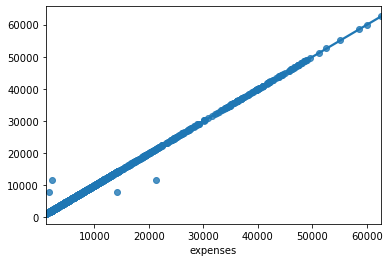

In [240]:
sns.regplot(y_train, y_train_pred_KNR)

In [241]:
r2_score(y_train,y_train_pred_KNR)

0.9983078115527046

#### Predicting Test set

In [242]:
y_test_pred_KNR = model_best.predict(X_test_final)

In [243]:
y_train_pred_KNR

array([ 9193.84,  8534.67, 27117.99, ..., 11931.13, 46113.51, 10214.64])

In [244]:
y_test_pred_KNR[:5]

array([ 8938.5583426 ,  4661.30323792, 27279.26661625, 13090.10879747,
       26591.11022166])

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

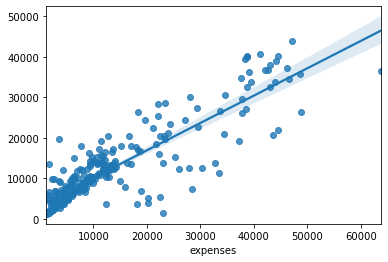

In [245]:
sns.regplot(y_test, y_test_pred_KNR)

## Checking the error and R2 score for test dataset with the parameter after grid search

In [246]:
r2_score(y_test,y_test_pred_KNR)

0.7561119997485194

In [247]:
np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))

6153.316439957857

## We can see here that after grid search with the best param value k=5, the root mean squared error for the test set has been reduced from 6474.35 to 6153.31.

### With the change in value of K from 4 to 5 we are reducing root mean square error around 321.04. But as we know increasing k value sometimes increase the cost of the model. So for changing k value from 4 to 5 we may need the advice from any domain expert in this field.

### Random Forest Model

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
forest_reg = RandomForestRegressor()

In [250]:
forest_reg.fit(X_train_final, y_train)

RandomForestRegressor()

#### Predicting Train set

In [251]:
y_pred_train_forest = forest_reg.predict(X_train_final)

In [252]:
y_train[:10]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
170     13405.39
277      2150.47
1033    13747.87
209      6610.11
947     39047.29
Name: expenses, dtype: float64

In [253]:
y_pred_train_forest[:10]

array([ 9429.3383, 10061.9484, 20423.2735, 10155.0182, 12465.619 ,
       14065.3851,  2499.3325, 13936.1183,  6719.9606, 39373.3529])

In [254]:
mse_forest_train = mean_squared_error(y_train, y_pred_train_forest)

In [255]:
rmse_forest_train = np.sqrt(mse_forest_train)

In [256]:
rmse_forest_train

1902.5701502862778

In [257]:
r2_score(y_train, y_pred_train_forest)

0.9749207901823052

#### Predicting Test set

In [258]:
y_pred_test_forest = forest_reg.predict(X_test_final)

In [259]:
y_test[:10]

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
1312     4536.26
899      2117.34
752     14210.54
1286     3732.63
707     10264.44
Name: expenses, dtype: float64

In [260]:
y_pred_test_forest[:10]

array([10152.0197,  5578.9357, 28123.1073, 11930.07  , 34654.5727,
        9270.8752,  2042.7275, 14291.8451,  5334.971 , 10786.4578])

In [261]:
mse_forest_test = mean_squared_error(y_test, y_pred_test_forest)

In [262]:
rmse_forest_test = np.sqrt(mse_forest_test)

In [263]:
rmse_forest_test

4668.409060924261

In [264]:
r2_score(y_test, y_pred_test_forest)

0.8596185447899231

In [265]:
# For Trainset Random forest showed 97.53% R2 score whereas for Testset it showed 86.14% score
# Comparing all the test set scores we will take up the Random Forest for further parameter tuning as amongs all the models
# this model gave highest R2 score for the Test Dataset.

#### We can see that among all the models (Linear Regression, Decision Tree, KNN, Random Forest, we got the RMSE score lowest for the test data set in Random Forest Alogorithm
#### Random Forest also seems to be overfitting though its R2_score for the test set is quite good than other models, so we are trying to optimize the RMSE by Hyper parameter tuning and K- Fold cross validation

## Hyper parameter Tuning 

In [266]:
from pprint import pprint

In [267]:
print('Parameters currently in use:\n')
pprint(forest_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 50, stop = 250, num = 20)], 
               'max_features':[2, 4, 6], 
               'bootstrap': [True, False]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [310]:
grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False], 'max_features': [2, 4, 6],
                          'n_estimators': [50, 60, 71, 81, 92, 102, 113, 123,
                                           134, 144, 155, 165, 176, 186, 197,
                                           207, 218, 228, 239, 250]}],
             scoring='neg_mean_squared_error')

In [311]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 250}

In [312]:
best_model = grid_search.best_estimator_

In [313]:
best_model.fit(X_train_final, y_train)

RandomForestRegressor(max_features=4, n_estimators=250)

In [314]:
y_pred_train_best_model = best_model.predict(X_train_final)

In [315]:
y_pred_train_best_model[:10]

array([ 9463.78784, 10275.22088, 21100.99336,  8756.77236, 12237.6352 ,
       13552.27752,  2406.17792, 14167.38488,  6837.68272, 39600.31   ])

In [316]:
y_train[:10]

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
170     13405.39
277      2150.47
1033    13747.87
209      6610.11
947     39047.29
Name: expenses, dtype: float64

In [317]:
y_pred_test_best_model = best_model.predict(X_test_final)

In [318]:
y_pred_test_best_model[:10]

array([11123.9292 ,  5963.96092, 28533.47596, 10682.144  , 33960.72108,
        7948.21732,  2702.612  , 14746.26608,  5022.67892, 10955.49604])

In [319]:
y_test[:10]

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
1312     4536.26
899      2117.34
752     14210.54
1286     3732.63
707     10264.44
Name: expenses, dtype: float64

In [320]:
## For train set root mean squared error
np.sqrt(mean_squared_error(y_train,y_pred_train_best_model))

1832.5145800543964

In [321]:
## For test set root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred_test_best_model))

4482.3547855174875

In [322]:
## R2_score for train set
r2_score(y_train, y_pred_train_best_model)

0.9767336975837227

In [323]:
## R2 score for test set
r2_score(y_test, y_pred_test_best_model)

0.8705850673244124

### Checking R2 score for train and test set after hyper parameter tuning and 5 fold cross validation

In [324]:
mses_best_model_hpt_r2_train = cross_val_score(best_model, X_train_final, y_train, cv = 5, scoring = 'r2')

In [325]:
mses_best_model_hpt_r2_train.mean()

0.8358329135133754

In [326]:
mses_best_model_hpt_r2_test = cross_val_score(best_model, X_test_final, y_test, cv = 5, scoring = 'r2')

In [327]:
mses_best_model_hpt_r2_test.mean()

0.8462990515390887

#### After Hyperparameter tuning  Best Model gives the R2 score as almost 83.58% for train dataset and for test dataset it gives the R2 score as almost 84.62%
#### That means for the train set it gives 84% of the changeability of the dependent output variable and for the test set also it gives 84% of the changeability of the dependent output variables.

#### As per the above modelling Random Forest seemed to be the best model to work with after hyperparameter tuning of which we got a good r2 score which can explain 84% of the variability of the dependent variable can be explained by the model